In [109]:
## Fill the missing age (male-female) with median data

import pandas as pd 

train= pd.read_csv(r"D:\Safa\Jupyter_path\Titanic_Kaggle\train.csv")
test = pd.read_csv(r"D:\Safa\Jupyter_path\Titanic_Kaggle\test.csv")

In [110]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
## find the common pattern to tag a numerical value against it for example, Mr.=0, Mrs.=1 etc.

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [112]:
## we need to fill age with median number, fill out the cabin numbers with help of their class 

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
sns.set() # for graph

In [113]:
def bar_chart(feature):
    survive= train[train["Survived"]==1][feature].value_counts()
    dead= train[train["Survived"]==0][feature].value_counts()
    df= pd.DataFrame([survive,dead])
    df.index= ["Survive","Dead"]
    df.plot(kind="bar",stacked = True, figsize=(10,5))
    
    

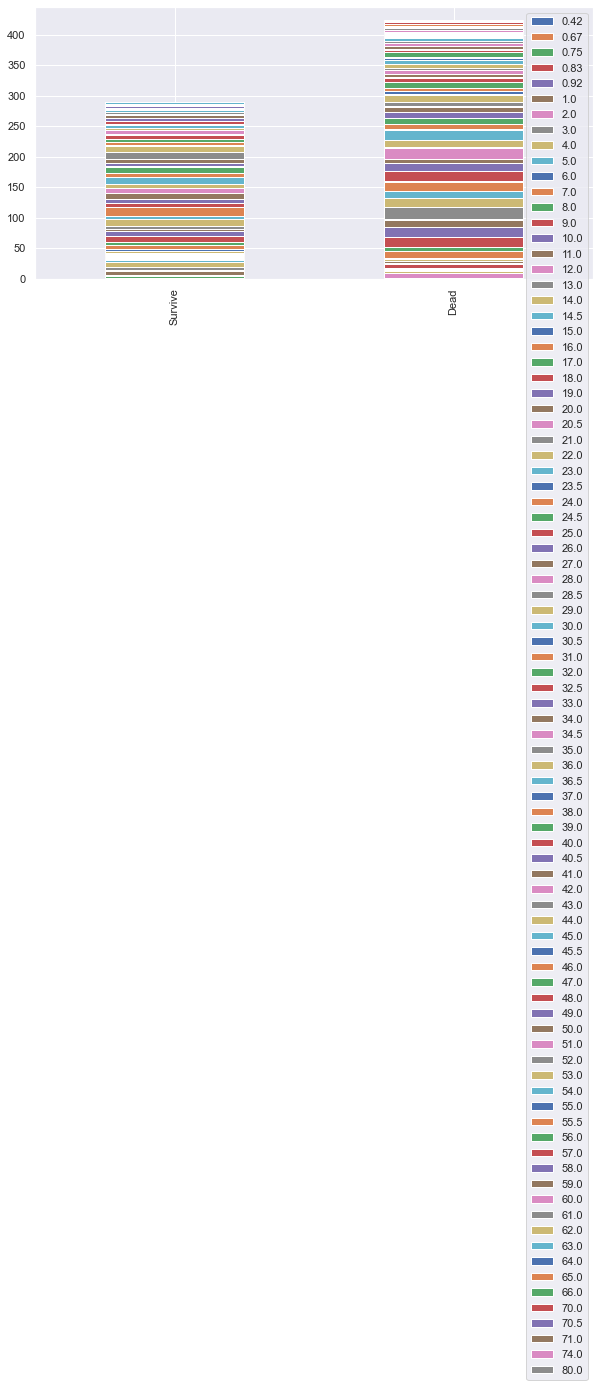

In [114]:
 bar_chart("Age")

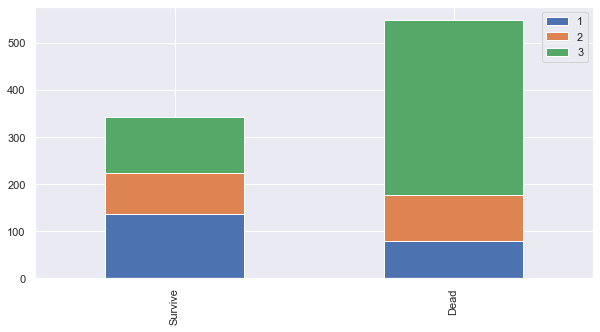

In [115]:
 bar_chart("Pclass")

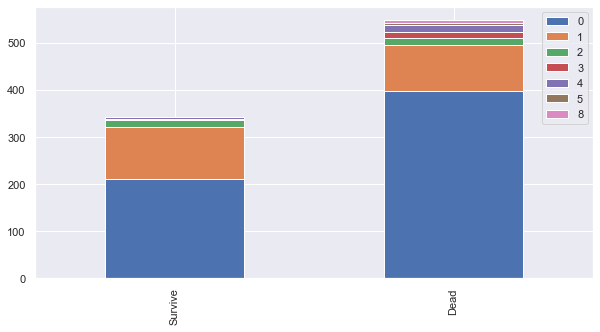

In [116]:
 bar_chart("SibSp")

In [117]:
train_test= [train,test]
#new feature to be added as name tittle

# for dataset in train_test: 
#     dataset["tittle"]= dataset["Name"].str.extract(' ([A-Za-z]+).', expand=False)

for dataset in train_test:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [118]:
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Sir           1
Mme           1
Don           1
Jonkheer      1
Lady          1
Countess      1
Capt          1
Ms            1
Name: Title, dtype: int64

In [119]:
Title_mapping = {"Mr":0,"Miss":1, "Mrs":2, "Master":3,"Dr":3,"Rev":3,"Col":3,"Mlle":3,"Major":3,"Ms":3,"Don":3,"Capt":3,"Countess":3,
"Jonkheer":3,"Lady":3,"Sir":3,"Mme":3}

for dataset in train_test:
    dataset["Title"]= dataset["Title"].map(Title_mapping) #title mapping is the variable declared earlier 

In [120]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [121]:
train.drop("Name",axis=1,inplace=True)
test.drop("Name",axis=1,inplace= True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [122]:
Sex_map = {"male":0,"female":1}
for dataset in train_test:
    dataset["Sex"]= dataset["Sex"].map(Sex_map)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [123]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"),inplace= True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"),inplace = True)

In [124]:
train.head(25)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


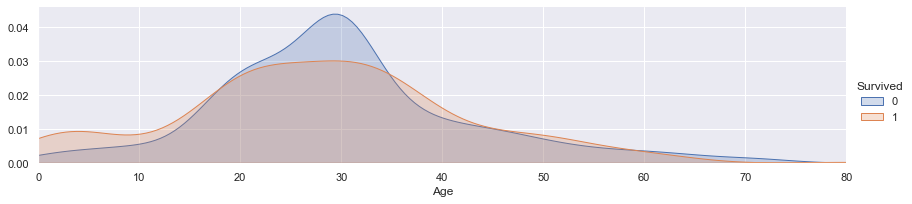

In [125]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()
plt.show()

In [126]:
# We will catagorize the age ranges such as child,young,adult,middle-age, old

for dataset in train_test:
    dataset.loc[dataset["Age"]<= 16,"Age"] = 0 
    dataset.loc[(dataset["Age"]>16) & (dataset["Age"]<=26),"Age"] = 1
    dataset.loc[(dataset["Age"]>26) & (dataset["Age"]<=36),"Age"] = 2
    dataset.loc[(dataset["Age"]>36) & (dataset["Age"]<=62),"Age"] = 3
    dataset.loc[dataset["Age"]>62,"Age"] = 4

In [127]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


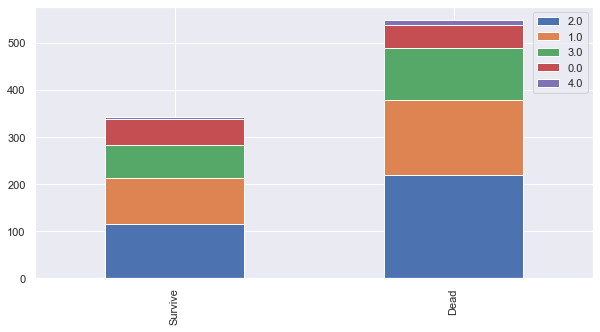

In [128]:
bar_chart("Age")

In [129]:
train["Embarked"]= train["Embarked"].fillna("s")
test["Embarked"]= test["Embarked"].fillna("s")

In [130]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [131]:
Embarked_title={"S":0,"Q":1,"C":2}

for dataset in train_test:
    dataset["Embarked"]=dataset["Embarked"].map(Embarked_title)

In [132]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0.0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,2.0,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0.0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0.0,0


In [133]:
# Pclass_title={"1":1.0,"2":2.0,"3":3.0}

# for dataset in train_test:
#     dataset["Pclass"]=dataset["Pclass"].map(Pclass_title)

In [134]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0.0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,2.0,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0.0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0.0,0


In [135]:
for dataset in train_test:
    dataset["Cabin"]= dataset["Cabin"].str[:1]
    
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0.0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C,2.0,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C,0.0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0.0,0


In [136]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [137]:
Cabin_title={"A":0.0,"B":0.4,"C":0.8,"D":1.2, "E":1.6, "F":2.0, "G": 2.4, "T":2.8}

for dataset in train_test:
    dataset["Cabin"]=dataset["Cabin"].map(Cabin_title)
    


<AxesSubplot:>

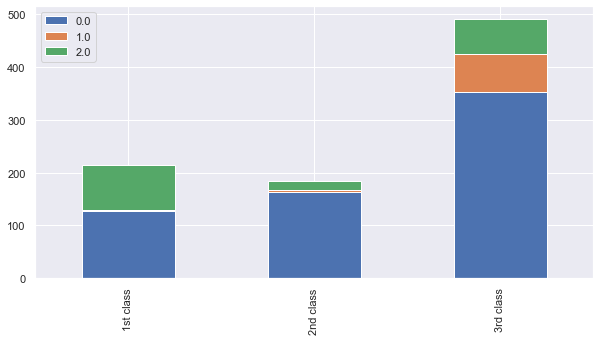

In [138]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [139]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"),inplace= True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"),inplace= True)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,2.0,0.0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,0.8,2.0,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,2.0,0.0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,0.8,0.0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,2.0,0.0,0


<AxesSubplot:>

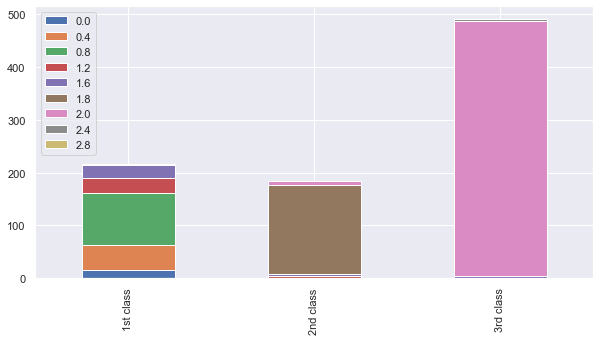

In [140]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [141]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace= True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"),inplace= True)

In [142]:
train.Fare.max()

512.3292

In [143]:
for dataset in train_test:
    dataset.loc[dataset["Fare"]<= 17,"Fare"] = 0
    dataset.loc[(dataset["Fare"]>17) & (dataset["Fare"]<=30),"Fare"] = 1
    dataset.loc[(dataset["Fare"]>30) & (dataset["Fare"]<=100),"Fare"] = 2
    dataset.loc[dataset["Fare"]>100,"Fare"] = 3

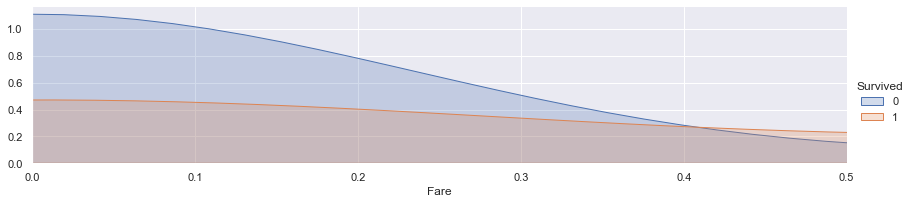

In [144]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Fare",shade= True)
facet.set(xlim=(0,train["Fare"].max()))
facet.add_legend()
plt.xlim(0.0,0.5)
plt.show()

In [145]:
train["Family_size"]= train["SibSp"]+ train["Parch"]+ 1
test["Family_size"]= test["SibSp"]+ test["Parch"]+ 1

In [146]:
train.Family_size.max()

11

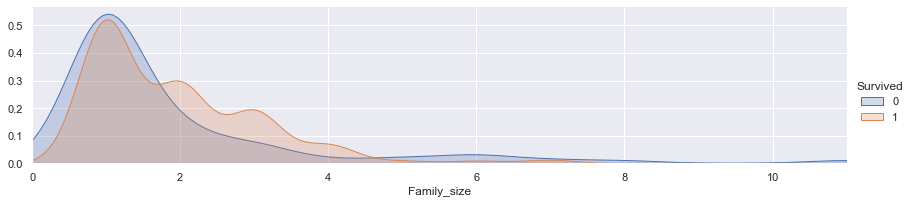

In [147]:
facet = sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Family_size",shade= True)
facet.set(xlim=(0,train["Family_size"].max()))
facet.add_legend()
plt.show()

In [148]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test:
    dataset['Family_size'] = dataset['Family_size'].map(family_mapping)

In [149]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0.0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,2.0,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0.0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0.0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0.0,0,0.0


In [150]:
feature_drop= ["Ticket","SibSp","Parch"]

train.drop(feature_drop,axis=1,inplace= True)
test.drop(feature_drop,axis=1,inplace= True)
train.drop(["PassengerId"],axis=1,inplace= True)
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family_size
0,0,3,0,1.0,0.0,2.0,0.0,0,0.4
1,1,1,1,3.0,2.0,0.8,2.0,2,0.4
2,1,3,1,1.0,0.0,2.0,0.0,1,0.0
3,1,1,1,2.0,2.0,0.8,0.0,2,0.4
4,0,3,0,2.0,0.0,2.0,0.0,0,0.0


In [151]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [152]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family_size
0,0,3,0,1.0,0.0,2.0,0.0,0,0.4
1,1,1,1,3.0,2.0,0.8,2.0,2,0.4
2,1,3,1,1.0,0.0,2.0,0.0,1,0.0
3,1,1,1,2.0,2.0,0.8,0.0,2,0.4
4,0,3,0,2.0,0.0,2.0,0.0,0,0.0


## Modelling


In [157]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Cabin        891 non-null    float64
 6   Embarked     889 non-null    float64
 7   Title        891 non-null    int64  
 8   Family_size  891 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 62.8 KB


In [158]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
k_fold = KFold(n_splits=10, shuffle= True, random_state=0)

In [159]:
# clf = KNeighborsClassifier(n_neighbors= 13)
# scoring="accuracy"
# score = cross_val_score(clf,train_data,target,cv-k_fold, n_jobs-1,scoring-scoring)
# print(score)
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[nan nan nan nan nan nan nan nan nan nan]


E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py", line 179, in fit
    return self._fit(X, y)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 363, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr",
  File "E:\Anaconda\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    